In [1]:
import csv
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import numpy as np
import pandas as pd
import pickle as pkl
import random

In [2]:
with open("brown_cn_new.pkl", "rb") as infile:
    cn_gold = pkl.load(infile)

In [3]:
def get_gold_wn(w):
    gold = []
    for syn in wordnet.synsets(w) :
        for l in syn.lemmas() :
            gold.append(l.name())
    gold = set(gold)
    gold.add(w)
    return gold

In [4]:
smile_wn = get_gold_wn("sword")
smile_cn = cn_gold_new['sword']
both = smile_wn.intersection(smile_cn)
s_wn = smile_wn - smile_cn
s_cn = smile_cn - smile_wn

NameError: name 'cn_gold_new' is not defined

In [42]:
sent = ""
for w in s_cn:
    sent += w + ", "
sent

'tuck, swordbearing, swordplay, buckler, scramasax, sheath, coulisse, toadsticker, rapper, bastard, badelaire, matachin, swordswomanship, langet, fencing, dah, menuki, allonge, suit, swordcraft, swordmaker, accollé, scimitar, swordfighter, odachi, sabre, caveating, estramacon, warrior, shinai, kopis, kissaki, dagger, gatka, card, swords, kris, swordster, xiphoid, braquemard, shabble, iaido, xiphophyllous, slice, stramazoun, knifeplay, ensiferous, espadon, unsworded, schiavona, machete, shield, zweihänder, swordsman, rapier, falchion, khopesh, curtana, hilt, forte, ricasso, broadsword, brandiron, kirpan, furbisher, pommel, toledo, whinyard, chape, epee, swordsmith, heraldry, degen, gladial, sharp, falx, edge, belt, longsword, faena, macharomancy, swordmaking, urumi, shiny, ensate, sax, swordpoint, xiphos, uchigatana, lay, swordlike, kindjal, loom, makhaira, swordproof, fish, pell, cinquedea, pilcher, point, swordsmithing, swordfight, macana, brond, long, gladiate, morglay, backsword, me

In [26]:
sent = ""
for w in get_gold_wn("blue"):
    sent += w + ", "
sent

'profane, downhearted, aristocratical, patrician, dark, drab, racy, wild_blue_yonder, bluish, risque, dispirited, drear, amobarbital_sodium, blasphemous, naughty, dingy, blue_devil, low, grim, downcast, bluing, depressed, down_in_the_mouth, blueness, Amytal, gamy, blueish, blue_angel, blue_air, sorry, blueing, disconsolate, dismal, low-spirited, blue, puritanic, down, blue-blooded, aristocratic, spicy, gentle, blue_sky, gloomy, puritanical, dreary, juicy, gamey, '

In [25]:
sent = ""
for w in cn_gold_new['blue']:
    sent += w + ", "
sent

'profane, royal, blow, urocyanin, calypso, shibuichi, cyanometer, caesious, baby, zaffre, democratic, windows, associate, bluebell, bice, lazuline, bluish, flame, violet, magenta, violets, velvet, shiver, green, vishnu, sad, bluewash, rhapsody, hues, aqua, nonblue, roller, bluey, red, ultramarine, watchet, pyocyanic, azureous, robins, colour, ozone, rare, moo, pearly, literary, factory, sky, bluefin, bluepoint, sadness, genipocyanin, pornographic, noble, blueing, ao, bluen, triad, salamstone, bluewards, white, flute, benitoite, melancholic, indicolite, skies, fifth, acyanopia, unblue, flag, quark, shade, blueward, colors, bluestocking, lycaenidae, azure, dihydroethidium, larkspur, dungaree, cupredoxin, dark, shock, smoke, gray, before, boy, main, plan, threw, other, orchid, bluestockinged, and, tristimulus, crayons, cross, teal, boys, butterfly, ravenclaw, blueberried, bluing, cloud, bluefaced, stilton, cyanosis, first, observation, smurfy, purple, yellow, blueberries, azuline, bluenes

In [65]:
arr1 = arr2 = [1, 2, 3]
np.mean([arr1, arr2], axis=0)

array([1., 2., 3.])

In [6]:
with open("kmeans_clusters_cn_glove_1.pkl", "rb") as infile:
    kmeans_clusters_cn = pkl.load(infile)

In [7]:
words = []
words_idx = []
clusters = []
for cluster_idx in kmeans_clusters_cn :
    precision_wn, recall_wn, precision_cn, recall_cn = [], [], [], []
    cluster = kmeans_clusters_cn[cluster_idx]
    for word in cluster :
        gold_wn = get_gold_wn(word)
        gold_cn = cn_gold[word]
        gold_cn.add(word)
        
        true_positive_wn = len(cluster.intersection(gold_wn))
        false_positive_wn = len(cluster - gold_wn)
        false_negative_wn = len(gold_wn - cluster)
        p_wn = true_positive_wn / (true_positive_wn + false_positive_wn)
        r_wn = true_positive_wn / (true_positive_wn + false_negative_wn)
        precision_wn.append(p_wn)
        recall_wn.append(r_wn)
        
        
        true_positive_cn = len(cluster.intersection(gold_cn))
        false_positive_cn = len(cluster - gold_cn)
        false_negative_cn = len(gold_cn - cluster)
        p_cn = true_positive_cn / (true_positive_cn + false_positive_cn)
        r_cn = true_positive_cn / (true_positive_cn + false_negative_cn)
        precision_cn.append(p_cn)
        recall_cn.append(r_cn)
        
        words_idx.append(word)
        words.append({"precision_wn" : p_wn, "recall_wn" : r_wn, "precision_cn" : p_cn, "recall_cn" : r_cn})
        
    clusters.append({"precision_wn" : np.mean(precision_wn),
                     "recall_wn" : np.mean(recall_wn),
                     "precision_cn" : np.mean(precision_cn),
                     "recall_cn" : np.mean(recall_cn)})

In [8]:
df_words = pd.DataFrame(words, index=words_idx)
df_clusters = pd.DataFrame(clusters)

In [9]:
df_words.to_csv("kmeans_glove_brown_words.csv")
df_clusters.to_csv("kmeans_glove_brown_clusters.csv")

In [30]:
clusters = []
indices = []
idx = 0
for cluster_idx in kmeans_clusters_cn:
    cluster = kmeans_clusters_cn[cluster_idx]
    if len(cluster) > 2 :
        clusters.append(" ".join(cluster))
        indices.append(idx)
    idx += 1

In [39]:
data = {"index" : indices, "words" : clusters}
df_kmeans_clusters = pd.DataFrame(data)

In [41]:
df_kmeans_clusters.to_csv("../mturk/sample.csv", index=False)

In [6]:
df_words.loc['camera']

NameError: name 'df_words' is not defined

In [61]:
kmeans_clusters_cn[6] - get_gold_wn('apple')

{'blackberry',
 'camera',
 'flash',
 'led',
 'messenger',
 'notebook',
 'opera',
 'telephone',
 'windows'}

In [24]:
get_gold_wn("blackberry")

{'blackberry', 'blackberry_bush'}

In [33]:
camera = cn_gold['camera'].add('camera')

In [35]:
kmeans_clusters_cn[6].intersection(cn_gold['camera'])

{'camera', 'flash'}

In [59]:
len(kmeans_clusters_cn[6] - cn_gold['camera'])

8

In [86]:
lens = []
sizes = []
clusters = []
for cluster in kmeans_clusters_cn:
    lens.append((len(kmeans_clusters_cn[cluster]), cluster))
    sizes.append(len(kmeans_clusters_cn[cluster]))
    clusters.append(cluster)

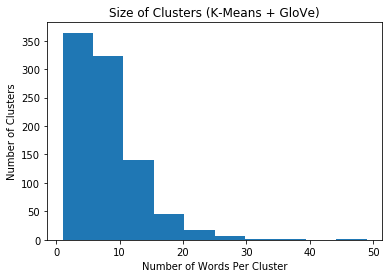

In [102]:
plt.hist(sizes)
plt.title("Size of Clusters (K-Means + GloVe)")
plt.xlabel("Number of Words Per Cluster")
plt.ylabel("Number of Clusters")
plt.show()

In [100]:
histo = []
for x in range(49):
    histo.append((x, sizes.count(x)))
histo

[(0, 0),
 (1, 40),
 (2, 83),
 (3, 78),
 (4, 85),
 (5, 78),
 (6, 83),
 (7, 65),
 (8, 71),
 (9, 53),
 (10, 51),
 (11, 43),
 (12, 33),
 (13, 28),
 (14, 15),
 (15, 22),
 (16, 15),
 (17, 7),
 (18, 10),
 (19, 9),
 (20, 4),
 (21, 7),
 (22, 4),
 (23, 4),
 (24, 3),
 (25, 0),
 (26, 2),
 (27, 2),
 (28, 0),
 (29, 2),
 (30, 1),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 1),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0)]

In [99]:
sorted(lens)

[(1, 1),
 (1, 4),
 (1, 5),
 (1, 18),
 (1, 31),
 (1, 42),
 (1, 63),
 (1, 78),
 (1, 89),
 (1, 121),
 (1, 173),
 (1, 236),
 (1, 256),
 (1, 263),
 (1, 266),
 (1, 295),
 (1, 326),
 (1, 329),
 (1, 347),
 (1, 415),
 (1, 422),
 (1, 427),
 (1, 513),
 (1, 525),
 (1, 552),
 (1, 561),
 (1, 573),
 (1, 680),
 (1, 689),
 (1, 706),
 (1, 755),
 (1, 758),
 (1, 781),
 (1, 828),
 (1, 833),
 (1, 865),
 (1, 894),
 (1, 895),
 (1, 896),
 (1, 899),
 (2, 21),
 (2, 27),
 (2, 33),
 (2, 34),
 (2, 36),
 (2, 45),
 (2, 49),
 (2, 52),
 (2, 66),
 (2, 75),
 (2, 76),
 (2, 81),
 (2, 91),
 (2, 98),
 (2, 110),
 (2, 129),
 (2, 135),
 (2, 136),
 (2, 138),
 (2, 148),
 (2, 157),
 (2, 161),
 (2, 164),
 (2, 178),
 (2, 195),
 (2, 207),
 (2, 241),
 (2, 258),
 (2, 270),
 (2, 275),
 (2, 282),
 (2, 308),
 (2, 313),
 (2, 340),
 (2, 343),
 (2, 349),
 (2, 354),
 (2, 372),
 (2, 379),
 (2, 391),
 (2, 405),
 (2, 441),
 (2, 449),
 (2, 469),
 (2, 470),
 (2, 481),
 (2, 485),
 (2, 493),
 (2, 507),
 (2, 532),
 (2, 544),
 (2, 553),
 (2, 556),
 (2

In [98]:
kmeans_clusters_cn[173]

{'triangle'}

In [9]:
with open("kmeans_clusters_cn_glove_1.pkl", "rb") as infile:
    clusters = pkl.load(infile)

In [11]:
sample_clusters = {}
for cluster in clusters:
    if len(clusters[cluster]) > 2:
        sample_clusters[cluster] = clusters[cluster]

In [14]:
with open("brown_glove_clusters_sample.pkl", "wb") as outfile:
    pkl.dump(sample_clusters, outfile)

In [16]:
with open("brown_glove_clusters_sample.pkl", "rb") as infile:
    sample_clusters = pkl.load(infile)

In [17]:
samples = random.sample(sample_clusters.keys(), 300)

In [18]:
sample1, sample2, sample3 = {}, {}, {}
for x in range(100):
    sample1[samples[x]] = sample_clusters[samples[x]]
for x in range(100, 200):
    sample2[samples[x]] = sample_clusters[samples[x]]
for x in range(200, 300):
    sample3[samples[x]] = sample_clusters[samples[x]]

In [21]:
sample1

{780: {'culprits',
  'detectives',
  'gangs',
  'murderers',
  'picket',
  'scandals',
  'tragedies',
  'witness',
  'witnesses'},
 3: {'hospital', 'port', 'terminal'},
 850: {'anchor',
  'buckle',
  'cuff',
  'cuffs',
  'knife',
  'knot',
  'knuckle',
  'ladder',
  'leash',
  'plank',
  'roller',
  'rope',
  'skates',
  'sock',
  'tail'},
 191: {'colleagues', 'member', 'members', 'staff', 'veterans', 'volunteers'},
 888: {'cleft',
  'connoisseur',
  'corkscrew',
  'decorator',
  'pail',
  'parlor',
  'sealing',
  'stamping',
  'wrapper'},
 495: {'arm', 'cross', 'door', 'hand', 'hole', 'lift', 'ring'},
 311: {'avoided',
  'backed',
  'blamed',
  'claimed',
  'claiming',
  'deliberately',
  'informed',
  'recall',
  'refused',
  'spies',
  'threatening',
  'warn',
  'warned'},
 658: {'bounced', 'flopped', 'slid', 'sped', 'swerved', 'swung', 'ticked'},
 376: {'below',
  'bottom',
  'broad',
  'flat',
  'height',
  'inches',
  'length',
  'upper'},
 294: {'blood',
  'brain',
  'deep',
  '

In [22]:
with open("../mturk/batch1.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample1:
        c = " ".join(sample1[cluster])
        writer.writerow([cluster, c])
        
with open("../mturk/batch2.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample2:
        c = " ".join(sample2[cluster])
        writer.writerow([cluster, c])
        
with open("../mturk/batch3.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample3:
        c = " ".join(sample3[cluster])
        writer.writerow([cluster, c])

In [17]:
pilot_clusters = {}
for sample in random.sample(sample_clusters.keys(), 20):
    pilot_clusters[sample] = clusters[sample]

In [23]:
with open("../mturk/pilot_clusters.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["index", "words"])
    
    for cluster in pilot_clusters:
        c = " ".join(pilot_clusters[cluster])
        writer.writerow([cluster, c])

In [5]:
with open('/Users/alyssahwang/Downloads/Batch_277895_batch_results.csv', 'r') as infile:
    results = pd.read_csv(infile)

In [6]:
results

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.index,Input.words,Answer.clusters,Answer.num_clusters,Approve,Reject
0,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,217,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,creep jerk darn goddamn dammit fucken\nsilly f...,2,NaN,NaN
1,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,28,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,gross creep jerk darn goddamn dammit dumb spoi...,2,NaN,NaN
2,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,35,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,gross creep jerk dumb spoiled weird ugly stupi...,3,NaN,NaN
3,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,26,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,kissed screamed touched shouted pointed giggle...,1,NaN,NaN
4,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,95,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,kissed touched shook \npointed stared waved sm...,3,NaN,NaN
5,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,152,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,screamed shouted giggled whispered cheered gre...,2,NaN,NaN
6,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,210,0% (0/0),0% (0/0),0% (0/0),738,selfishness indignation contempt distaste dism...,selfishness modesty \nindignation contrition \...,6,NaN,NaN
7,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,61,0% (0/0),0% (0/0),0% (0/0),738,selfishness indignation contempt distaste dism...,contempt distaste indignation dismay\ncontriti...,5,NaN,NaN
8,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a l

In [12]:
results1 = results.groupby(['Input.index', 'Input.words'], as_index=False)['Answer.num_clusters'].mean()

In [14]:
results1

,Input.index,Input.words,Answer.num_clusters
0,54,drama movies bachelor gossip,1.666667
1,69,blushing touching pose kissing,2.333333
2,212,haste hum hath bade mere mast,4.666667
3,234,mice chickens bees cows mosquitoes turkeys,1.666667
4,273,eat cooking cook eating food dishes,1.000000
5,294,minds heart blood thoughts brain deep soul lif...,1.666667
6,317,gross creep jerk silly funny darn goddamn damm...,2.333333
7,353,unimpressed fascinated amused outraged frighte...,3.333333
8,413,tales puzzle survival journey tale suspense ma...,4.000000
9,420,kissed screamed touched shouted pointed giggle...,2.000000


In [15]:
results1['Answer.num_clusters'].mean()

2.7666666666666666

In [3]:
with open("kmeans_clusters_gv_0.pkl", "rb") as infile:
    clusters = pkl.load(infile)

In [4]:
clusters

{0: {'dms', 'msg', 'msgs'},
 1: {'porno'},
 2: {'cel', 'fone'},
 3: {'belo',
  'com',
  'logo',
  'monte',
  'num',
  'os',
  'ou',
  'outro',
  'pro',
  'tens',
  'um'},
 4: {'app',
  'etc',
  'facebook',
  'google',
  'instagram',
  'internet',
  'mail',
  'twitter',
  'whatsapp',
  'wifi'},
 5: {'+'},
 6: {'chat', 'dm', 'fb', 'inbox', 'insta', 'offline', 'skype'},
 7: {'wilt'},
 8: {'ils', 'ont', 'qui', 'sont'},
 9: {'amg',
  'diz',
  'eles',
  'gata',
  'gostei',
  'nem',
  'nessa',
  'nova',
  'sim',
  'tempo',
  'uma',
  'vc',
  'á',
  'é',
  'ó'},
 10: {'ai'},
 11: {'da', 'do', 'e', 'em', 'moro', 'na', 'nas'},
 12: {'replies', 'texts', 'txts', 'unread', 'voicemail', 'voicemails'},
 13: {'stabilized'},
 14: {'aff',
  'ali',
  'alo',
  'bia',
  'bj',
  'cu',
  'dae',
  'dai',
  'faze',
  'irma',
  'ja',
  'kk',
  'mae',
  'mor',
  'ri',
  'rs',
  'sai'},
 15: {'tyrese'},
 16: {'contacts',
  'emails',
  'emojis',
  'imessage',
  'interactions',
  'loading',
  'messages',
  'notific